#STORES DATA

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
pd.read_csv("Stores.csv")

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [5]:
Stores = pd.read_csv("Stores.csv")

In [6]:
Stores.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [7]:
Stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [8]:
#Now to determine some maxima, minima and averages.
round(Stores['Store_Sales'].mean(),2)

59351.31

In [9]:
round(Stores['Store_Sales'].min(),2)

14920

In [10]:
round(Stores['Store_Sales'].max(),2)

116320

In [11]:
#Better to get some summary data straight up.
Stores.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Items_Available'>

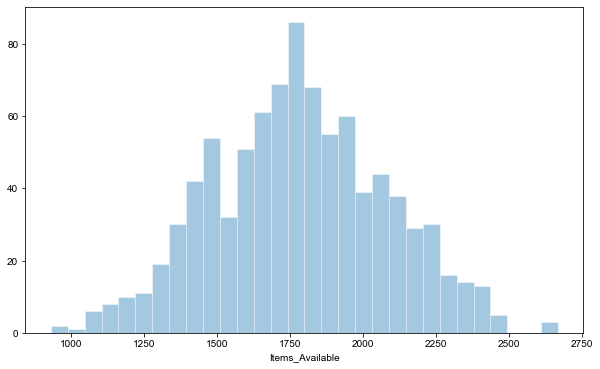

In [12]:
#Now to visualise a few of the numerical variables by distribution.
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style("darkgrid")
sns.distplot(Stores['Items_Available'],kde=False,bins=30)

<AxesSubplot:xlabel='Daily_Customer_Count'>

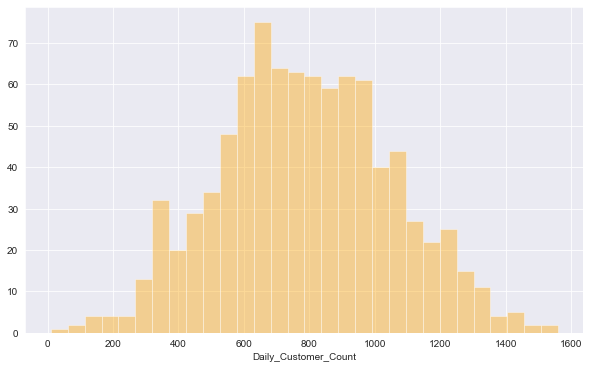

In [13]:
#Now to visualise a few of the numerical variables by distribution.
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style("darkgrid")
sns.distplot(Stores['Daily_Customer_Count'],kde=False,bins=30, color="orange")

<AxesSubplot:xlabel='Store_Sales'>

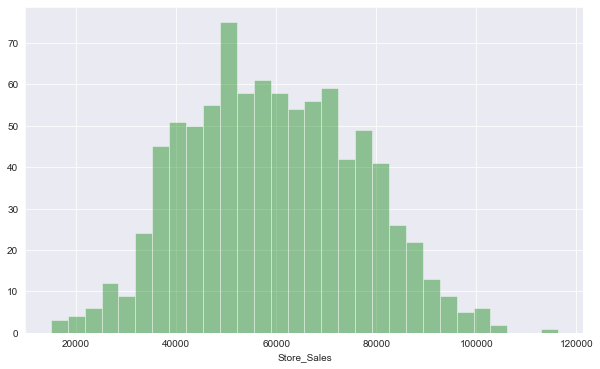

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style("darkgrid")
sns.distplot(Stores['Store_Sales'],kde=False,bins=30, color="green")

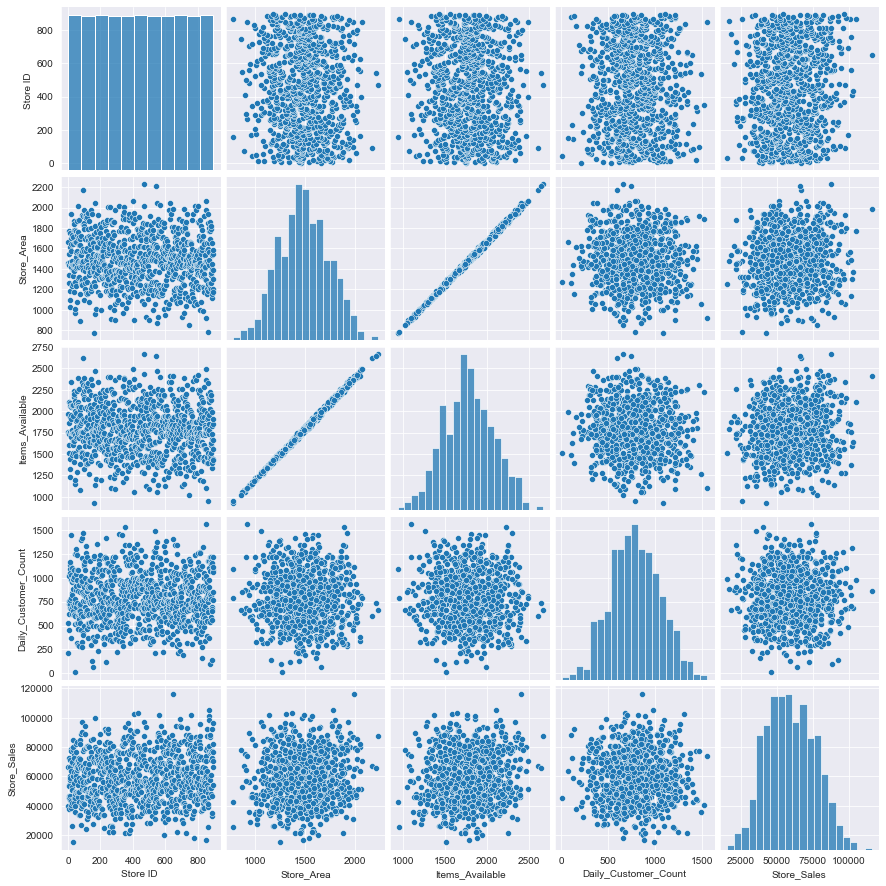

In [15]:
#These are fairly normally distributed. For a quick overview of correlations, it is worthwhile
#constructing a pairplot
sns.pairplot(Stores)

In [17]:
#Looks like there no correlations among the data. Ignore Store ID and Store_Area.
#Although Store_Area is a numerically listed variable it is in essence categorical.
#So let's selct only 
Stores_2 = Stores

In [19]:
Stores_2.drop('Store_Area', axis=1, inplace=True)
Stores_2.head()

,Store ID,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1961,530,66490
1,2,1752,210,39820
2,3,1609,720,54010
3,4,1748,620,53730
4,5,2111,450,46620


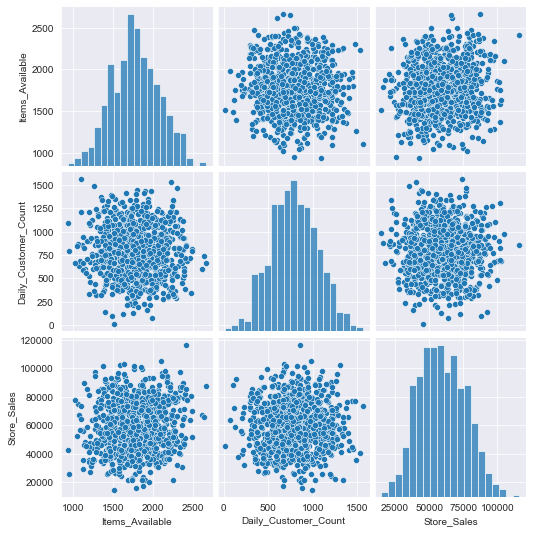

In [20]:
sns.pairplot(Stores[['Items_Available', 'Daily_Customer_Count', 'Store_Sales']])

In [23]:
#That looks more appropriate but still hard to see any correlations at a glance.
#We need to look more closely and divide the data up by quartiles for sales.
Stores_2_Fourth = Stores_2[Stores_2['Store_Sales']>=71872.500000]
Stores_2_Fourth

,Store ID,Items_Available,Daily_Customer_Count,Store_Sales
6,7,1858,1030,72240
15,16,1950,790,78870
16,17,1907,1440,77250
28,29,1943,710,78100
29,30,2071,650,84860
...,...,...,...,...
886,887,1986,1150,77430
887,888,1398,140,92370
892,893,1663,850,82080
893,894,1436,1060,76440


In [24]:
Stores_2_Third = Stores_2[(Stores_2['Store_Sales']>=58605.000000) & (Stores_2['Store_Sales']<71872.500000)]
Stores_2_Third

,Store ID,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1961,530,66490
10,11,1439,1090,71280
12,13,2064,1050,60470
13,14,1931,1160,59130
14,15,1756,770,66360
...,...,...,...,...
875,876,2023,540,60270
878,879,1468,1210,61210
880,881,1516,780,70980
890,891,1851,1220,70620


In [25]:
Stores_2_Second = Stores_2[(Stores_2['Store_Sales']>=46530.000000) & (Stores_2['Store_Sales']<58605.000000)]
Stores_2_Second

,Store ID,Items_Available,Daily_Customer_Count,Store_Sales
2,3,1609,720,54010
3,4,1748,620,53730
4,5,2111,450,46620
11,12,2098,720,57620
22,23,2065,950,52780
...,...,...,...,...
877,878,2138,820,57820
882,883,2187,590,47920
883,884,1625,1140,52160
889,890,1829,650,46580


In [26]:
Stores_2_First = Stores_2[(Stores_2['Store_Sales']>=0) & (Stores_2['Store_Sales']<46530.000000)]
Stores_2_First

,Store ID,Items_Available,Daily_Customer_Count,Store_Sales
1,2,1752,210,39820
5,6,1733,760,45260
7,8,1507,1020,37720
8,9,1321,680,46310
9,10,1235,1130,44150
...,...,...,...,...
864,865,2195,1170,41090
865,866,951,790,25600
870,871,1776,800,46230
884,885,1673,690,32740


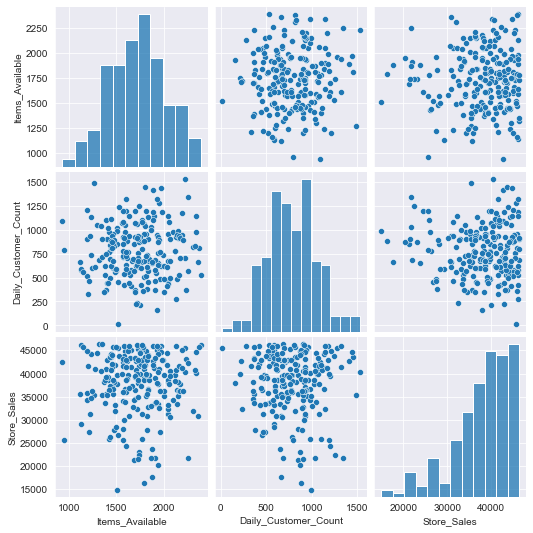

In [27]:
#Now see if there are any systematic patterns.
sns.pairplot(Stores_2_First[['Items_Available','Daily_Customer_Count','Store_Sales']])

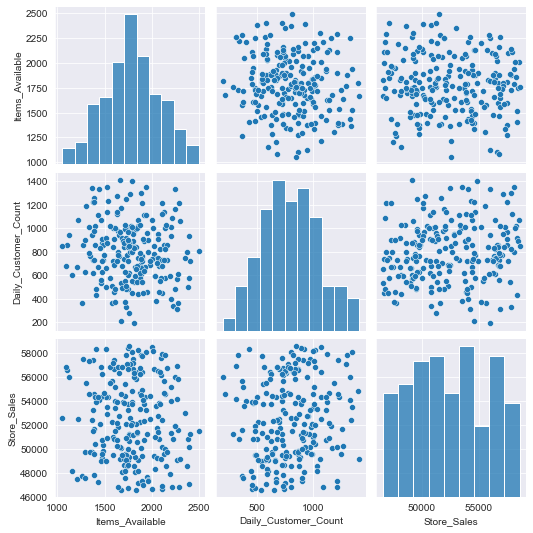

In [29]:
sns.pairplot(Stores_2_Second[['Items_Available','Daily_Customer_Count','Store_Sales']])

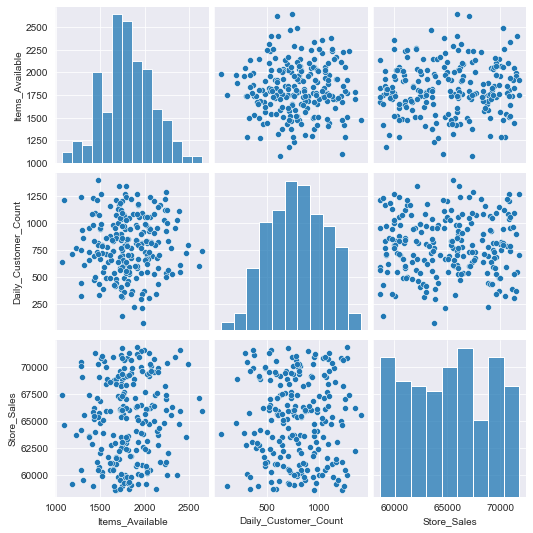

In [30]:
sns.pairplot(Stores_2_Third[['Items_Available','Daily_Customer_Count','Store_Sales']])

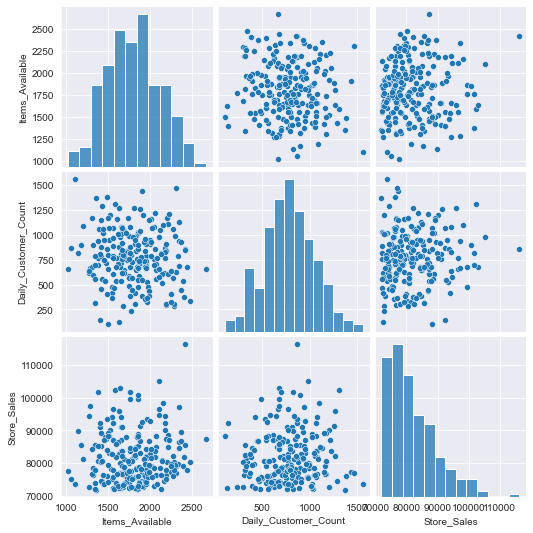

In [31]:
sns.pairplot(Stores_2_Fourth[['Items_Available','Daily_Customer_Count','Store_Sales']])